#**ETUDE DE MARCHÉ**

# **Notebook 1/2** -  Préparation, nettoyage et analyse exploratoire des données


# Contexte

La poule qui chante, une entreprise française d’agroalimentaire, souhaite se développer à l'international.
Une première analyse des groupements de pays à cibler pour exporter des poulets est requise.

Une étude de marché plus approfondie sera menée ultérieurement.

# Source des données

4 tables de données ont été exploitées:
- FAOSTAT :
  DisponibiliteAlimentaire_2017.csv, FAOSTAT_PIB.csv et Population_2000_2018 :
- World Bank open data :
  EoDB2017 The World bank.xlsx





# Choix des variables

Les 6 critères d'une analyse PESTEL ; Politique, Économique, Légal, Socioculturel, Environnemental et Technologique, ont contribué aux choix des variables.


Variables relative à la volailles séléctionnées :

**Economique** :
*   la Disponibilité alimentaire en quantité (kg/personne/an)
*   Le ratio quantité volaille / quantité d'apport proteique animal total, calculé à partir des données des Disponibilités alimentaire
*   Disponibilité de protéines en quantité (g/personne/jour) - **Abandonnée** -
*   Le ratio proteine issus de volaille / quantité de proteines animales totales, calculé à partir des données Disponibilité de protéines  - **Abandonnée** -
*  Production (Milliers de tonnes)
*  Importations - Quantité (Milliers de tonnes)
*  Exportations - Quantité (Milliers de tonnes)
*  PIB par habitant


**Socioculturel** :
*   Population (Milliers de personnes)
*   Coefficient de croissance callculé  sur les données de la table Population

**Politique, Économique, Légal, Technologique** :
*  index Ease of doing business EoDB 2017








L'indice de facilité à faire des affaires (EoDB) est un système de classement établi par la Banque mondiale. Le score d'une économie en matière de facilité de faire des affaires est exprimé sur une échelle de 0 à 100, où 0 représente la performance la plus faible et 100 la meilleure.

Le score est établi sur 10 caractéristiques :

*  Démarrer une entreprise
*  Obtenir un permis de construire
*  Obtenir de l'électricité
*  Enregistrer une propriété
*  Obtenir un crédit
*  Protéger les investisseurs minoritaires
*  Payer des impôts
*  Commercer au-delà des frontières
*  Exécuter des contrats
*  Résoudre l'insolvabilité


SOURCE = World Bank open data

Le critère **environnemental** sera envisagé dans l'analyse finale.



# 1- Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Installation de la bibliothèque pingouin
!pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.7 MB/s eta 0:00:00


In [3]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=f15d74f9e763f36a2b5dd1a9be3cf06ec630bfe815464d31c3ff28cc7ac56c0a
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [4]:
from googletrans import Translator
translator = Translator()

# 2 - Créations des dataframes et revue des données


## 2.1 Disponibilité alimentaire 2017

### 2.1.1 Création du dataframe

In [5]:
file_path1 = '/content/DisponibiliteAlimentaire_2017.csv'
dispo2017 = pd.read_csv(file_path1)
dispo2017.head()



,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [6]:
# Taille
dispo2017.shape


(176600, 14)

In [7]:
# Information sur les données
dispo2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

Il n'y a pas de valeur nulle.

Le type de la variable Année n'est pas correct mais cette variable ne sera pas conservée puisque toutes les données sont celles de 2017

### 2.1.2 Revue du contenu des variables

In [8]:
# Nombre de pays
Nb_pays = dispo2017['Code zone'].nunique()
print(Nb_pays)

174


In [9]:
# Valeurs de la variable Année
Valeur_Année = dispo2017['Année'].unique()
print(Valeur_Année)

[2017]


In [10]:
# Valeurs de la variable Domaine
Valeur_Domaine = dispo2017['Domaine'].unique()
print(Valeur_Domaine)

['Nouveaux Bilans Alimentaire']


In [11]:
# Liste des valeurs de la variable produit
Valeur_Produit = dispo2017['Produit'].unique()
for valeur_produit in Valeur_Produit:
    print(valeur_produit)


Blé et produits
Riz et produits
Orge et produits
Maïs et produits
Seigle et produits
Avoine
Millet et produits
Sorgho et produits
Céréales, Autres
Pommes de Terre et produits
Ignames
Racines nda
Sucre, canne
Sucre, betterave
Sucre Eq Brut
Edulcorants Autres
Miel
Haricots
Pois
Légumineuses Autres et produits
Noix et produits
Soja
Arachides Decortiquees
Graines de tournesol
Graines Colza/Moutarde
Graines de coton
Coco (Incl Coprah)
Sésame
Olives
Plantes Oleiferes, Autre
Huile de Soja
Huile d'Arachide
Huile de Tournesol
Huile de Colza&Moutarde
Huile Graines de Coton
Huile de Palmistes
Huile de Palme
Huile de Coco
Huile de Sésame
Huile d'Olive
Huile de Son de Riz
Huile de Germe de Maïs
Huil Plantes Oleif Autr
Tomates et produits
Oignons
Légumes, Autres
Oranges, Mandarines
Citrons & Limes et produits
Pamplemousse et produits
Agrumes, Autres
Bananes
Pommes et produits
Ananas et produits
Dattes
Raisin
Fruits, Autres
Café et produits
Feve de Cacao et produits
Thé
Poivre
Piments
Girofles
Épices

In [12]:
# Liste des valeurs de la variable Element
Valeur_Element = dispo2017['Élément'].unique()
for Valeur_element in Valeur_Element:
    print(Valeur_element)

Production
Importations - Quantité
Variation de stock
Exportations - Quantité
Disponibilité intérieure
Aliments pour animaux
Semences
Pertes
Résidus
Nourriture
Disponibilité alimentaire en quantité (kg/personne/an)
Disponibilité alimentaire (Kcal/personne/jour)
Disponibilité de protéines en quantité (g/personne/jour)
Disponibilité de matière grasse en quantité (g/personne/jour)
Traitement
Autres utilisations (non alimentaire)
Alimentation pour touristes


### 2.1.3 Préparation des données

#### a - Calcul du ratio de la disponibilité de viande de volaille par rapport la quantité totale des apports proteiques d'origine animale

In [13]:
#Création de la liste de toutes les sources de viandes animales
Liste_viande= ["Viande de Bovins","Viande d'Ovins/Caprins","Viande de Suides","Viande de Volailles","Viande, Autre","Abats Comestible","Poissons Eau Douce",
               "Poissons Pelagiques","Poissons Marins, Autres","Crustacés","Cephalopodes","Mollusques, Autres","Animaux Aquatiques Autre","Viande de Anim Aquatiq"]

In [14]:
len(Liste_viande)

14

In [15]:
# Selection de toutes les viandes
dispo_viande = dispo2017.loc[dispo2017['Produit'].isin(Liste_viande)]
dispo_viande.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
622,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2731,Viande de Bovins,2017,2017,Milliers de tonnes,94.0,S,Données standardisées
623,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2017,2017,Milliers de tonnes,6.0,S,Données standardisées
624,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2731,Viande de Bovins,2017,2017,Milliers de tonnes,-0.0,S,Données standardisées
625,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2731,Viande de Bovins,2017,2017,Milliers de tonnes,100.0,S,Données standardisées
626,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2731,Viande de Bovins,2017,2017,Milliers de tonnes,5.0,S,Données standardisées


In [16]:
# Sélection de la valeur de la variable Elément
viande_total= dispo_viande.loc[(dispo_viande['Élément'] == 'Disponibilité alimentaire en quantité (kg/personne/an)'),['Zone','Produit','Valeur']]

# Le DataFrame est pivoté pour afficher une ligne par pays et les valeurs  de la variable Elément sélectionnée en colonnes.
viande_total_pivot = viande_total.pivot_table(index=['Zone'], columns='Produit', values='Valeur').reset_index()
viande_total_pivot.head()

Produit,Zone,Abats Comestible,Animaux Aquatiques Autre,Cephalopodes,Crustacés,"Mollusques, Autres",Poissons Eau Douce,"Poissons Marins, Autres",Poissons Pelagiques,Viande d'Ovins/Caprins,Viande de Anim Aquatiq,Viande de Bovins,Viande de Suides,Viande de Volailles,"Viande, Autre"
0,Afghanistan,1.47,NaN,NaN,NaN,NaN,0.25,NaN,NaN,4.15,NaN,2.61,0.00,1.53,0.30
1,Afrique du Sud,4.95,0.01,0.16,0.27,0.11,0.21,0.07,2.65,2.88,NaN,16.57,4.19,35.69,0.68
2,Albanie,5.86,0.00,0.41,0.35,0.37,0.83,0.74,1.58,9.11,NaN,14.67,7.20,16.36,0.17
3,Algérie,1.39,0.00,0.09,0.11,0.00,0.17,0.32,2.75,6.69,NaN,4.63,0.00,6.38,0.35
4,Allemagne,1.41,0.02,0.26,0.88,0.38,4.42,0.36,2.49,0.82,NaN,14.91,50.45,19.47,2.13


In [17]:
viande_total_pivot.shape

(172, 15)

In [18]:
viande_total_pivot.isnull().sum()

Produit
Zone                          0
Abats Comestible              0
Animaux Aquatiques Autre     15
Cephalopodes                  3
Crustacés                     1
Mollusques, Autres            1
Poissons Eau Douce            0
Poissons Marins, Autres       2
Poissons Pelagiques           1
Viande d'Ovins/Caprins        0
Viande de Anim Aquatiq      169
Viande de Bovins              0
Viande de Suides              3
Viande de Volailles           0
Viande, Autre                 0
dtype: int64

In [19]:
# Les valeurs manquantes sont considérées comme nulles
viande_total_pivot.fillna(0, inplace=True)

In [20]:
viande_total_pivot.head()

Produit,Zone,Abats Comestible,Animaux Aquatiques Autre,Cephalopodes,Crustacés,"Mollusques, Autres",Poissons Eau Douce,"Poissons Marins, Autres",Poissons Pelagiques,Viande d'Ovins/Caprins,Viande de Anim Aquatiq,Viande de Bovins,Viande de Suides,Viande de Volailles,"Viande, Autre"
0,Afghanistan,1.47,0.00,0.00,0.00,0.00,0.25,0.00,0.00,4.15,0.0,2.61,0.00,1.53,0.30
1,Afrique du Sud,4.95,0.01,0.16,0.27,0.11,0.21,0.07,2.65,2.88,0.0,16.57,4.19,35.69,0.68
2,Albanie,5.86,0.00,0.41,0.35,0.37,0.83,0.74,1.58,9.11,0.0,14.67,7.20,16.36,0.17
3,Algérie,1.39,0.00,0.09,0.11,0.00,0.17,0.32,2.75,6.69,0.0,4.63,0.00,6.38,0.35
4,Allemagne,1.41,0.02,0.26,0.88,0.38,4.42,0.36,2.49,0.82,0.0,14.91,50.45,19.47,2.13


In [21]:
viande_total_pivot.isnull().sum()

Produit
Zone                        0
Abats Comestible            0
Animaux Aquatiques Autre    0
Cephalopodes                0
Crustacés                   0
Mollusques, Autres          0
Poissons Eau Douce          0
Poissons Marins, Autres     0
Poissons Pelagiques         0
Viande d'Ovins/Caprins      0
Viande de Anim Aquatiq      0
Viande de Bovins            0
Viande de Suides            0
Viande de Volailles         0
Viande, Autre               0
dtype: int64

In [22]:
# Création de la variable Disponiblité totale en viande (kg/personne/an)
viande_total_pivot['disponibilité totale viande (kg/personne/an)'] = viande_total_pivot.iloc[:, 1:].sum(axis=1)
viande_total_pivot.head()


Produit,Zone,Abats Comestible,Animaux Aquatiques Autre,Cephalopodes,Crustacés,"Mollusques, Autres",Poissons Eau Douce,"Poissons Marins, Autres",Poissons Pelagiques,Viande d'Ovins/Caprins,Viande de Anim Aquatiq,Viande de Bovins,Viande de Suides,Viande de Volailles,"Viande, Autre",disponibilité totale viande (kg/personne/an)
0,Afghanistan,1.47,0.00,0.00,0.00,0.00,0.25,0.00,0.00,4.15,0.0,2.61,0.00,1.53,0.30,10.31
1,Afrique du Sud,4.95,0.01,0.16,0.27,0.11,0.21,0.07,2.65,2.88,0.0,16.57,4.19,35.69,0.68,68.44
2,Albanie,5.86,0.00,0.41,0.35,0.37,0.83,0.74,1.58,9.11,0.0,14.67,7.20,16.36,0.17,57.65
3,Algérie,1.39,0.00,0.09,0.11,0.00,0.17,0.32,2.75,6.69,0.0,4.63,0.00,6.38,0.35,22.88
4,Allemagne,1.41,0.02,0.26,0.88,0.38,4.42,0.36,2.49,0.82,0.0,14.91,50.45,19.47,2.13,98.00


In [23]:
# Calcul du ratio viande de volaille / viande totale
viande_total_pivot['ratio quantité volaille'] = round(viande_total_pivot['Viande de Volailles']/viande_total_pivot['disponibilité totale viande (kg/personne/an)'],2)

# On ne garde que Zone et ratio quantité volaille
ratio_quantité_volaille = viande_total_pivot[['Zone','ratio quantité volaille']]
ratio_quantité_volaille.head()

Produit,Zone,ratio quantité volaille
0,Afghanistan,0.15
1,Afrique du Sud,0.52
2,Albanie,0.28
3,Algérie,0.28
4,Allemagne,0.20


In [24]:
print(viande_total_pivot.isnull().sum())

Produit
Zone                                            0
Abats Comestible                                0
Animaux Aquatiques Autre                        0
Cephalopodes                                    0
Crustacés                                       0
Mollusques, Autres                              0
Poissons Eau Douce                              0
Poissons Marins, Autres                         0
Poissons Pelagiques                             0
Viande d'Ovins/Caprins                          0
Viande de Anim Aquatiq                          0
Viande de Bovins                                0
Viande de Suides                                0
Viande de Volailles                             0
Viande, Autre                                   0
disponibilité totale viande (kg/personne/an)    0
ratio quantité volaille                         0
dtype: int64


Pas de valeur nulle.

#### b - Calcul du ratio de la disponibilité en proteine issue de la volaille par rapport aux proteines animales totales.

In [25]:
#  Sélection de la valeur de la variable Elément
dispo_prot = dispo_viande.loc[dispo_viande['Élément'] == 'Disponibilité de protéines en quantité (g/personne/jour)',['Zone','Produit','Valeur']]

#  Le DataFrame est pivoté pour afficher une ligne par pays et les valeurs sélectionnées de la variable Elément en colonnes.
dispo_prot_pivot = dispo_prot.pivot_table(index=['Zone'], columns='Produit', values='Valeur').reset_index()
dispo_prot_pivot.head()

Produit,Zone,Abats Comestible,Animaux Aquatiques Autre,Cephalopodes,Crustacés,"Mollusques, Autres",Poissons Eau Douce,"Poissons Marins, Autres",Poissons Pelagiques,Viande d'Ovins/Caprins,Viande de Anim Aquatiq,Viande de Bovins,Viande de Suides,Viande de Volailles,"Viande, Autre"
0,Afghanistan,0.64,NaN,NaN,NaN,NaN,0.07,NaN,NaN,1.62,NaN,1.09,0.00,0.54,0.14
1,Afrique du Sud,2.71,0.0,0.06,0.07,0.01,0.06,0.02,0.91,1.00,NaN,6.64,1.12,14.11,0.34
2,Albanie,2.65,0.0,0.16,0.10,0.02,0.25,0.21,0.51,3.42,NaN,6.20,2.17,6.26,0.26
3,Algérie,0.61,0.0,0.04,0.03,0.00,0.04,0.09,0.89,2.45,NaN,1.95,0.00,1.97,0.15
4,Allemagne,0.76,0.0,0.10,0.22,0.03,1.20,0.13,0.79,0.28,NaN,5.34,13.89,7.96,1.22


In [26]:
# Les valeurs manquantes sont considérées comme nulles
dispo_prot_pivot.fillna(0, inplace=True)

In [27]:
# Création de la variable Disponiblité proteine totale viande (kg/personne/an)
dispo_prot_pivot['disponibilité totale proteine(g/personne/jour)'] = dispo_prot_pivot.iloc[:, 1:].sum(axis=1)

In [28]:
 # Calcul du ratio proteine issue de viande de volaille / viande totale
dispo_prot_pivot['ratio proteine volaille'] = round(dispo_prot_pivot['Viande de Volailles']/dispo_prot_pivot['disponibilité totale proteine(g/personne/jour)'],2)

In [29]:
# On ne garde que Zone et ratio proteine volaille
ratio_proteine=dispo_prot_pivot[['Zone','ratio proteine volaille']]
ratio_proteine.head()

Produit,Zone,ratio proteine volaille
0,Afghanistan,0.13
1,Afrique du Sud,0.52
2,Albanie,0.28
3,Algérie,0.24
4,Allemagne,0.25


In [30]:
# Vérification des valeurs nulles
print(dispo_prot_pivot.isnull().sum())

Produit
Zone                                              0
Abats Comestible                                  0
Animaux Aquatiques Autre                          0
Cephalopodes                                      0
Crustacés                                         0
Mollusques, Autres                                0
Poissons Eau Douce                                0
Poissons Marins, Autres                           0
Poissons Pelagiques                               0
Viande d'Ovins/Caprins                            0
Viande de Anim Aquatiq                            0
Viande de Bovins                                  0
Viande de Suides                                  0
Viande de Volailles                               0
Viande, Autre                                     0
disponibilité totale proteine(g/personne/jour)    0
ratio proteine volaille                           0
dtype: int64


#### c - Selection des variables et des lignes du df dispo2017 pertinentes pour l'analyse

In [31]:
# Filtrer les colonnes et ne conserver  que les lignes pour lesquelles le Produit = Viande de volailles.

elements = [
    'Production',
    'Importations - Quantité',
    'Exportations - Quantité',
    'Disponibilité alimentaire en quantité (kg/personne/an)',
    'Disponibilité de protéines en quantité (g/personne/jour)']

dispo2017_filtré = dispo2017.loc[(dispo2017['Produit'] == 'Viande de Volailles') & (dispo2017['Élément'].isin(elements)),['Zone', 'Élément', 'Valeur']]
dispo2017_filtré  =dispo2017_filtré.reset_index(drop=True)
dispo2017_filtré.head()


,Zone,Élément,Valeur
0,Afghanistan,Production,28.00
1,Afghanistan,Importations - Quantité,29.00
2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,1.53
3,Afghanistan,Disponibilité de protéines en quantité (g/pers...,0.54
4,Afrique du Sud,Production,1667.00


In [32]:
# On pivote le DataFrame pour afficher une ligne par pays et les valeurs sélectionnées de la variable Elément en colonnes.
dispo2017_volaille = dispo2017_filtré.pivot_table(index=['Zone'], columns='Élément', values='Valeur').reset_index()
dispo2017_volaille.head()

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,1.53,0.54,NaN,29.0,28.0
1,Afrique du Sud,35.69,14.11,63.0,514.0,1667.0
2,Albanie,16.36,6.26,0.0,38.0,13.0
3,Algérie,6.38,1.97,0.0,2.0,275.0
4,Allemagne,19.47,7.96,646.0,842.0,1514.0


In [33]:
# On simplifie le nom des variables
dispo2017_volaille=dispo2017_volaille.rename(columns={'Disponibilité alimentaire en quantité (kg/personne/an)': 'Disponibilité volaille'})
dispo2017_volaille=dispo2017_volaille.rename(columns={'Disponibilité de protéines en quantité (g/personne/jour)': 'Disponibilité proteine volaille'})
dispo2017_volaille.head()

Élément,Zone,Disponibilité volaille,Disponibilité proteine volaille,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,1.53,0.54,NaN,29.0,28.0
1,Afrique du Sud,35.69,14.11,63.0,514.0,1667.0
2,Albanie,16.36,6.26,0.0,38.0,13.0
3,Algérie,6.38,1.97,0.0,2.0,275.0
4,Allemagne,19.47,7.96,646.0,842.0,1514.0


In [34]:
dispo2017_volaille.shape

(172, 6)

#### d - Jointure du df dispo2017_volaille avec les dataframes "ratio"

In [35]:
dispo_merge1=pd.merge(ratio_proteine, dispo2017_volaille,how='inner',on=['Zone'])


In [36]:
dispo_merge2=pd.merge(ratio_quantité_volaille,dispo_merge1,how='inner', on = ['Zone'])
dispo_merge2.head()

,Zone,ratio quantité volaille,ratio proteine volaille,Disponibilité volaille,Disponibilité proteine volaille,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,0.15,0.13,1.53,0.54,NaN,29.0,28.0
1,Afrique du Sud,0.52,0.52,35.69,14.11,63.0,514.0,1667.0
2,Albanie,0.28,0.28,16.36,6.26,0.0,38.0,13.0
3,Algérie,0.28,0.24,6.38,1.97,0.0,2.0,275.0
4,Allemagne,0.20,0.25,19.47,7.96,646.0,842.0,1514.0


In [37]:
dispo_merge2.shape


(172, 8)

Les deux ratios (quantité et proteine) semblent être trés similaires, conserver les deux n'est peut être pas très pertinent. On peut evaluer leur corrélation par régression linéaire :

In [38]:
# Régression linéaire entre 'ratio quantité volaille' et 'ratio proteine volaille'
lm=pg.linear_regression(dispo_merge2['ratio quantité volaille'], dispo_merge2['ratio proteine volaille'])
lm.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.012,0.004,2.751,0.007,0.97,0.97,0.003,0.02
1,ratio quantité volaille,0.964,0.013,74.231,0.000,0.97,0.97,0.938,0.99


Le r² est égal à 0.97. avec une pval à 0.000. Les 2 ratios sont étroitement corrélés. On supprime, arbitrairement, le ratio proteine.

On peut aussi regarder la corrélatoin entre Disponibilité volaille (kg/personne/an) et Disponibilité proteine volaille (kg/personne/an), le 2ème étant issu du premier.

In [39]:
# Régression linéaire entre 'Disponibilité volaille' et 'Disponibilité proteine volaille'
lm=pg.linear_regression(dispo_merge2['Disponibilité volaille'], dispo_merge2['Disponibilité proteine volaille'])
lm.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.079,0.116,0.685,0.495,0.972,0.972,-0.149,0.307
1,Disponibilité volaille,0.348,0.005,77.408,0.000,0.972,0.972,0.340,0.357


Dans ce cas aussi Le r² est égal à 0.97 avec une pval à 0.000. Les 2 variables sont étroitement corrélés. On supprime, arbitrairement, 'Disponibilité proteine volaille (kg/personne/an).

In [40]:
dispo_merge2=dispo_merge2.drop(columns=['ratio proteine volaille','Disponibilité proteine volaille'])

In [41]:
# Information générales sur le df
dispo_merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zone                     172 non-null    object 
 1   ratio quantité volaille  172 non-null    float64
 2   Disponibilité volaille   172 non-null    float64
 3   Exportations - Quantité  135 non-null    float64
 4   Importations - Quantité  170 non-null    float64
 5   Production               168 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.2+ KB


In [42]:
# Somme des valeurs nulles
print(dispo_merge2.isnull().sum())

Zone                        0
ratio quantité volaille     0
Disponibilité volaille      0
Exportations - Quantité    37
Importations - Quantité     2
Production                  4
dtype: int64


#### e - Traitement des valeurs nulles

**Production**

In [43]:
# Recherche des pays pourlesquels 'Production' = NaN
null_Production  = dispo2017_volaille[dispo2017_volaille['Production'].isnull()]
null_Production.head(10)

Élément,Zone,Disponibilité volaille,Disponibilité proteine volaille,Exportations - Quantité,Importations - Quantité,Production
43,Djibouti,2.68,0.92,NaN,3.0,NaN
92,Maldives,13.50,4.70,NaN,12.0,NaN
113,Ouzbékistan,1.96,0.63,NaN,NaN,NaN
130,République démocratique populaire lao,10.91,3.59,NaN,NaN,NaN


Pour ces 4 pays, on peut aller chercher des informations complémentaires dans le df dispo2017 initial, notamment la disponibilité intérieure.

In [44]:
# Comparaison de la disponibilité intérieure avec Production, Importation et Exportations pour les 4 pays

elements_sup = ['Production',
    'Importations - Quantité',
    'Exportations - Quantité',
    'Disponibilité intérieure']

null_prod_info = dispo2017.loc[(dispo2017['Produit'] == 'Viande de Volailles') & (dispo2017['Élément'].isin(elements_sup)),['Zone', 'Élément', 'Valeur']]
null_prod_pays  =null_prod_info.reset_index(drop=True)

# sélection des pays
null_prod_pays= null_prod_info.loc[(null_prod_info['Zone'] == 'Djibouti')|(null_prod_info['Zone'] == 'Maldives')|(null_prod_info['Zone'] == 'Ouzbékistan')|(null_prod_info['Zone'] == 'République démocratique populaire lao')]
null_prod_pays.head(16)

,Zone,Élément,Valeur
46488,Djibouti,Importations - Quantité,3.0
46490,Djibouti,Disponibilité intérieure,3.0
102919,Maldives,Importations - Quantité,12.0
102921,Maldives,Disponibilité intérieure,12.0



Pour Djbouti et les Maldives la disponibilité intérieure est égale aux importations. On peut donc conclure que la production (et plus tard l'exportation) sont à 0. Mais ces informations ne sont disponibles pas pour les 2 autres pays.

Sur le site de la FAO on trouve pour la variable 'produit' = 'Viande, poulet, fraîche ou réfrigérée' en 2017 :

République démocratique populaire lao : 28441.68 tonnes produites (noté comme valeur imputée). Unités du df = milliers de tonnes soit : 24.41

Ouzbékistan : 74800 tonnes  produites (noté comme chiffre non officiel). Unités du df = milliers de tonnes soit : 74.8



In [45]:
# imputation des valeurs
dispo_merge2.loc[dispo_merge2['Zone'] == 'Djibouti','Production']= 0
dispo_merge2.loc[dispo_merge2['Zone'] == 'Maldives','Production']= 0
dispo_merge2.loc[dispo_merge2['Zone'] == 'Ouzbékistan','Production']= 74.8
dispo_merge2.loc[dispo_merge2['Zone'] == 'République démocratique populaire lao','Production']= 24.41


**Importations**

In [46]:
## Recherche des pays pourlesquels 'Importations' = NaN
null_Exportation  = dispo2017_volaille[dispo2017_volaille['Importations - Quantité'].isnull()]
null_Exportation.head(37)

Élément,Zone,Disponibilité volaille,Disponibilité proteine volaille,Exportations - Quantité,Importations - Quantité,Production
113,Ouzbékistan,1.96,0.63,NaN,NaN,NaN
130,République démocratique populaire lao,10.91,3.59,NaN,NaN,NaN



Sur le site de la FAO on trouve  pour la variable 'produit' = 'Viande, poulet, fraîche ou réfrigérée' en 2017 :


République démocratique populaire lao : 4129 tonnes importées (noté comme chiffre officiel) soit en milliers de tones = 4.13

Ouzbékistan : 7695.82 tonnes  importées (notées comme 'chiffre officiel') soit en milliers de tonnes = 7.70

In [47]:
# imputation des valeurs
dispo_merge2.loc[dispo_merge2['Zone'] == 'Ouzbékistan','Importations - Quantité']= 4.13
dispo_merge2.loc[dispo_merge2['Zone'] == 'République démocratique populaire lao','Importations - Quantité']= 7.70

In [48]:
# Somme des valeurs nulles
print(dispo_merge2.isnull().sum())

Zone                        0
ratio quantité volaille     0
Disponibilité volaille      0
Exportations - Quantité    37
Importations - Quantité     0
Production                  0
dtype: int64


**Exportations**

Il manque les données pour 37 pays. On peut faire une liste de ces pays et regarder plus de variables dans le df dispo2017 original.

In [49]:
#Liste des pays dont Exportations = Nan
Liste_zone_import_null = dispo_merge2.loc[dispo_merge2['Exportations - Quantité'].isnull(), 'Zone'].unique().tolist()

for valeur in Liste_zone_import_null:
    print(valeur)


Afghanistan
Bahamas
Bangladesh
Burkina Faso
Cabo Verde
Cambodge
Cuba
Djibouti
Gambie
Grenade
Guinée
Guinée-Bissau
Haïti
Kiribati
Madagascar
Malawi
Maldives
Mali
Mauritanie
Mongolie
Mozambique
Nouvelle-Calédonie
Népal
Ouzbékistan
République centrafricaine
République démocratique populaire lao
République-Unie de Tanzanie
Saint-Vincent-et-les Grenadines
Sainte-Lucie
Sao Tomé-et-Principe
Soudan
Tadjikistan
Timor-Leste
Turkménistan
Vanuatu
Zimbabwe
Éthiopie


In [50]:
# Sélection des pays et des élément complémentaires
dispo2017_exportations_null = dispo2017.loc[
    (dispo2017['Zone'].isin(Liste_zone_import_null)) &  # Filtrer les pays où les exportations sont nulles
    (dispo2017['Produit'] == 'Viande de Volailles') &  # Filtrer le produit
    ((dispo2017['Élément'].isin(['Production', 'Importations - Quantité',
                                  'Exportations - Quantité', 'Disponibilité intérieure','Disponibilité alimentaire en quantité (kg/personne/an)'])))  # Filtrer les éléments
    , ['Zone', 'Élément', 'Valeur']]  # Sélectionner uniquement les colonnes nécessaires

dispo2017_exportations_null = dispo2017_exportations_null.reset_index(drop=True)


In [51]:
# Pivot du df
dispo2017_exportations_null_pivot = dispo2017_exportations_null.pivot_table(index=['Zone'], columns='Élément', values='Valeur').reset_index()
dispo2017_exportations_null_pivot.head()

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Importations - Quantité,Production
0,Afghanistan,1.53,57.0,29.0,28.0
1,Bahamas,43.17,26.0,24.0,6.0
2,Bangladesh,1.50,250.0,0.0,249.0
3,Burkina Faso,2.27,46.0,0.0,46.0
4,Cabo Verde,17.62,10.0,12.0,1.0


In [52]:
dispo2017_exportations_null_pivot.shape

(37, 5)

On a bien les informations pour les 37 pays (37lignes).
On peut calculer le delta entre (Disponibilité intérieure et (production + importation). Un delta supérieur ou égal à 0 implique qu'il n'y a pas d'exportation.
On peut faire la liste de ces pays et leur imputer la valeur d'Exportations à 0


In [53]:
#calcul du delta
dispo2017_exportations_null_pivot['delta']=dispo2017_exportations_null_pivot['Disponibilité intérieure']-(dispo2017_exportations_null_pivot['Importations - Quantité']+dispo2017_exportations_null_pivot['Production'])
dispo2017_exportations_null_pivot.head()


Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Importations - Quantité,Production,delta
0,Afghanistan,1.53,57.0,29.0,28.0,0.0
1,Bahamas,43.17,26.0,24.0,6.0,-4.0
2,Bangladesh,1.50,250.0,0.0,249.0,1.0
3,Burkina Faso,2.27,46.0,0.0,46.0,0.0
4,Cabo Verde,17.62,10.0,12.0,1.0,-3.0


In [54]:
#Liste des pays avec un delta  >= 0
Liste_delta0 = dispo2017_exportations_null_pivot.loc[dispo2017_exportations_null_pivot['delta']>= 0, 'Zone'].unique().tolist()

for valeur in Liste_delta0:
    print(valeur)

Afghanistan
Bangladesh
Burkina Faso
Cambodge
Cuba
Grenade
Guinée
Haïti
Kiribati
Madagascar
Mali
Mozambique
Nouvelle-Calédonie
Népal
République centrafricaine
République-Unie de Tanzanie
Sainte-Lucie
Soudan
Tadjikistan
Zimbabwe


Pour ces 20 pays on peut imputer la valeur 0 aux Exportations dans le df dispo_merge2

In [55]:
#imputation des valeurs
dispo_merge2.loc[dispo_merge2['Zone'].isin(Liste_delta0), 'Exportations - Quantité'] = 0

Pour les autres pays on compare le delta négatif aux pertes et ou aux variations de stock.


In [56]:
#Liste des pays avec un delta  < 0
Liste_delta_neg = dispo2017_exportations_null_pivot.loc[dispo2017_exportations_null_pivot['delta']< 0, 'Zone'].unique().tolist()

for valeur in Liste_delta_neg:
    print(valeur)

Bahamas
Cabo Verde
Gambie
Guinée-Bissau
Malawi
Mauritanie
Mongolie
Saint-Vincent-et-les Grenadines
Sao Tomé-et-Principe
Timor-Leste
Turkménistan
Vanuatu
Éthiopie


In [57]:
#Sélection des variables et des lignes
dispo2017_delta_neg = dispo2017.loc[
    (dispo2017['Zone'].isin(Liste_delta_neg)) &  # Filtrer les pays où les exportations sont nulles
    (dispo2017['Produit'] == 'Viande de Volailles') &  # Filtrer le produit
    ((dispo2017['Élément'].isin(['Variation de stock','Pertes'])))  # Filtrer les éléments
    , ['Zone', 'Élément', 'Valeur']]  # Sélectionner uniquement les colonnes nécessaires

dispo2017_delta_neg  = dispo2017_delta_neg .reset_index(drop=True)

In [58]:
#pivot du tableau
dispo2017_delta_neg_pivot = dispo2017_delta_neg.pivot_table(index=['Zone'], columns='Élément', values='Valeur').reset_index()


In [59]:
# Jointure entre les df dispo2017_delta_neg_pivot et exportations_null_pivot
merge3=pd.merge(dispo2017_delta_neg_pivot,dispo2017_exportations_null_pivot,how='right', on = ['Zone'])

In [60]:
 #sélection des zones
zone_delta_neg=merge3.loc[merge3 ['Zone'].isin(Liste_delta_neg)]
zone_delta_neg.head(17)

Élément,Zone,Pertes,Variation de stock,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Importations - Quantité,Production,delta
1,Bahamas,NaN,4.0,43.17,26.0,24.0,6.0,-4.0
4,Cabo Verde,NaN,4.0,17.62,10.0,12.0,1.0,-3.0
8,Gambie,NaN,10.0,3.53,8.0,16.0,2.0,-10.0
11,Guinée-Bissau,NaN,3.0,2.16,4.0,4.0,3.0,-3.0
15,Malawi,7.0,33.0,5.17,98.0,0.0,130.0,-32.0
18,Mauritanie,NaN,6.0,5.14,22.0,24.0,5.0,-7.0
19,Mongolie,NaN,1.0,2.77,9.0,10.0,0.0,-1.0
27,Saint-Vincent-et-les Grenadines,NaN,1.0,72.31,8.0,9.0,0.0,-1.0
29,Sao Tomé-et-Principe,NaN,1.0,9.47,2.0,2.0,1.0,-1.0
32,Timor-Leste,NaN,7.0,4.24,5.0,11.0,1.0,-7.0


Pour ces 13 pays on constate que le delta négatif correspond quasiment à la variation de stock. On peut donc estimer l'exportation à 0.

In [61]:
liste_zone_stock = zone_delta_neg['Zone'].unique().tolist() # création de la liste
dispo_merge2.loc[dispo_merge2['Zone'].isin(liste_zone_stock ), 'Exportations - Quantité'] = 0 #imputation des valeurs


**Production**

In [62]:
# Recherche des derniers pays pourlesquels 'Production' = NaN

Liste_4_zone_import_null = dispo_merge2.loc[dispo_merge2['Exportations - Quantité'].isnull(), 'Zone'].unique().tolist()

for valeur in Liste_4_zone_import_null:
    print(valeur)



Djibouti
Maldives
Ouzbékistan
République démocratique populaire lao


Pour Djbouti et les Maldives on a déjà vu plus haut que la disponibilité intérieure est égale aux importations. Il n'y a donc pas d'exportations.


https://www.tresor.economie.gouv.fr/Pays/UZ/le-commerce-exterieur-de-l-ouzbekistan-en-2018 :
 (...) Le principal produit d’exportation de l’Ouzbékistan est de loin les métaux précieux (...) Vient ensuite le coton,
 puis les combustibles minéraux, le cuivre, les vêtements et accessoires, les fruits, fruits secs , les légumes  et, à égalité, les engrais et matières plastiques.
 Pas d'export de volailles notable.

 https://www.tresor.economie.gouv.fr/Pays/LA/les-echanges-exterieurs-du-laos-en-2019
 Dans le rapport disponible pour le LAOS, pas d'exportation de volaille non plus

In [63]:
# Imputation des valeurs
dispo_merge2.loc[dispo_merge2['Zone'].isin(Liste_4_zone_import_null ), 'Exportations - Quantité'] = 0

In [64]:
print(dispo_merge2.isnull().sum())

Zone                       0
ratio quantité volaille    0
Disponibilité volaille     0
Exportations - Quantité    0
Importations - Quantité    0
Production                 0
dtype: int64


Le df dispo_merge2 est complet.

## 2.2 Population 2000-2018

### 2.2.1 Création du dataframe

In [65]:
file_path2 = '/content/Population_2000_2018.csv'
population = pd.read_csv(file_path2,delimiter=',', decimal=".")
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [66]:
population.shape

(4411, 15)

In [67]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [68]:
population.duplicated().sum()

0

In [69]:
print(population.isnull().sum())

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64


Pas de valeur nulle, pas de duplicat.

La variable Année n'a pas le bon type mais on ne va s'interresser qu'à l'année 2017, on ne conservera pas cette variable.

### 2.2.2 Revue du contenu des variables

In [70]:
Nb_Pays_pop = population['Code zone'].nunique()
print(Nb_Pays_pop)

238


In [71]:
Valeur_Domaine_pop = population['Domaine'].unique()
print(Valeur_Domaine_pop)

['Séries temporelles annuelles']


In [72]:
Valeur_Element_pop = population['Élément'].unique()
print(Valeur_Element_pop)

['Population totale']


In [73]:
Valeur_Produit_pop = population['Produit'].unique()
print(Valeur_Produit_pop)

['Population-Estimations']


In [74]:
liste_Description_Symbole = population['Description du Symbole'].unique()
print(liste_Description_Symbole)

['Sources internationales sûres'
 'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées']


In [75]:
Valeur_Année = population['Année'].unique()
print(Valeur_Année)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]


### 2.2.3 Préparation des données

###### a - Création d'un coefficient de croissance de la population

In [76]:
# Agrégation par Zone et Année
population_coef = population.sort_values(by=['Zone', 'Année'])


In [77]:
# Calcul du coefficient de croissance pour chaque pays
def calculate_coefficient_croissance(group):
    initial_population = group['Valeur'].iloc[0]  # Population initiale (première année)
    final_population = group['Valeur'].iloc[-1]  # Population finale (dernière année)
    coefficient_croissance = round((final_population - initial_population) / initial_population,2)
    return coefficient_croissance

In [78]:
coefficient_croissance = population_coef.groupby('Zone').apply(calculate_coefficient_croissance)

In [79]:
# Convertir la série en DataFrame
df_coefficient_croissance = coefficient_croissance.reset_index()

# Renommer les colonnes
df_coefficient_croissance.columns = ['Zone', 'Coefficient de croissance']

# Afficher le DataFrame résultant
df_coefficient_croissance.head()

,Zone,Coefficient de croissance
0,Afghanistan,0.79
1,Afrique du Sud,0.29
2,Albanie,-0.08
3,Algérie,0.36
4,Allemagne,0.02


###### b- Sélection de la population en 2017 (= année des données de diponibilité alimentaire)

In [80]:
# Selection des variables pour l'année 2017
# Sélectionner les colonnes 'Zone' et 'Valeur' pour l'année 2017
pop2017 = population.loc[population['Année'] == 2017, ['Zone', 'Valeur']]
pop2017 = pop2017.rename(columns={'Valeur' : 'Polulation'})
pop2017.head()


,Zone,Polulation
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756
55,Albanie,2884.169
74,Algérie,41389.189
93,Allemagne,82658.409


In [81]:
# Jointure de l'année 2017 avec le df_coefficient_croissance
pop2017 = pd.merge(pop2017,df_coefficient_croissance,how='inner', on = ['Zone'])
pop2017.head()

,Zone,Polulation,Coefficient de croissance
0,Afghanistan,36296.113,0.79
1,Afrique du Sud,57009.756,0.29
2,Albanie,2884.169,-0.08
3,Algérie,41389.189,0.36
4,Allemagne,82658.409,0.02


In [82]:
pop2017.isnull().sum()

Zone                         0
Polulation                   0
Coefficient de croissance    0
dtype: int64

Le df est complet.

## 2.3 PIB par habitant

Le produit intérieur brut par habitant donne une indication sur la capacité d'achat des consommateurs dans un pays donné.

source :  FAOSTAT 2017

### 2.3.1 Création du dataframe

In [83]:
file_path3 = '/content/FAOSTAT_PIB.csv'
PIB = pd.read_csv(file_path3,delimiter=';', decimal=".")
PIB.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6723.928582,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4521.752217,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4134.936055,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,44670.222282,X,Ciffre de sources internationales,NaN


In [84]:
PIB.shape[0]

211

In [85]:
PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            211 non-null    object 
 1   Domaine                 211 non-null    object 
 2   Code zone (M49)         211 non-null    int64  
 3   Zone                    211 non-null    object 
 4   Code Élément            211 non-null    int64  
 5   Élément                 211 non-null    object 
 6   Code Produit            211 non-null    int64  
 7   Produit                 211 non-null    object 
 8   Code année              211 non-null    int64  
 9   Année                   211 non-null    int64  
 10  Unité                   211 non-null    object 
 11  Valeur                  211 non-null    float64
 12  Symbole                 211 non-null    object 
 13  Description du Symbole  211 non-null    object 
 14  Note                    0 non-null      fl

Pas de valeur nulle

In [86]:
PIB.duplicated().sum()

0

Pas de ligne en double

###2.3.2 Préparation des données

In [87]:
# Selection des variables
PIB2017 = PIB[['Zone','Valeur']]
PIB2017=PIB2017.rename(columns ={'Valeur' : 'PIB_par_habitant'})
PIB2017['PIB_par_habitant']=round(PIB2017['PIB_par_habitant'],1)
PIB2017.head()

,Zone,PIB_par_habitant
0,Afghanistan,530.1
1,Afrique du Sud,6723.9
2,Albanie,4521.8
3,Algérie,4134.9
4,Allemagne,44670.2


## 2.4 EoDB : Ease of Doing Business Index

### 2.4.1 Création du dataframe

In [88]:
# Création du dataframe
file_path4 = '/content/EoDB The World bank.xlsx'
EoDB = pd.read_excel(file_path4)
EoDB.head()

,Country code,Economy,DB Year,Ease of doing business score (DB17-20 methodology)
0,AFG,Afghanistan,2020,44.06497
1,AFG,Afghanistan,2019,44.20343
2,AFG,Afghanistan,2018,37.13062
3,AFG,Afghanistan,2017,38.93563
4,AFG,Afghanistan,2016,39.25519


In [89]:
EoDB.shape[0]

3606

In [90]:
EoDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606 entries, 0 to 3605
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Country code                                        3606 non-null   object 
 1   Economy                                             3606 non-null   object 
 2   DB Year                                             3606 non-null   int64  
 3   Ease of doing business score (DB17-20 methodology)  1062 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 112.8+ KB


In [91]:
EoDB.duplicated().sum(0)

0

Pas de duplicat.

Il manque des ' Ease of doing business score' mais on revérifira quand on aura filtré sur l'année 2017

### 2.4.2 Préparation des données

In [92]:
# Renome les variables
EoDB=EoDB.rename(columns={'Economy': 'Zone_an'}) # Economy en Zone pour correspondre aux autres df
EoDB=EoDB.rename(columns={'Ease of doing business score (DB17-20 methodology)': 'EoDB'}) # remplace par l'abréviation

In [93]:
# Sélection de l'année 2017 et des variables Zone et EoDB2017
EoDB2017 = EoDB[(EoDB['DB Year'] == 2017)][['Zone_an','EoDB']]
EoDB2017['EoDB']=round(EoDB2017['EoDB'],2)
EoDB2017.head()

,Zone_an,EoDB
3,Afghanistan,38.94
20,Albania,64.16
37,Algeria,46.11
54,Angola,37.65
71,Antigua and Barbuda,58.81


In [94]:
EoDB2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 3 to 3592
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Zone_an  212 non-null    object 
 1   EoDB     212 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


Les types sont corrects, pas de null

In [95]:
# Traduction de la variable "Zone" en Fançais
def translate_text(text):
    try:
        translator = Translator()
        translation = translator.translate(text, src='en', dest='fr')
        return translation.text
    except Exception as e:
        return f"Error: {e}"


In [96]:
EoDB2017['Zone_fr'] = EoDB2017['Zone_an'].apply(translate_text)


In [97]:
# Recherche des erreurs générées à l'application de la fonction translate_text
EoDB2017[EoDB2017['Zone_fr'].str.contains("Error")]

,Zone_an,EoDB,Zone_fr
326,Benin,49.72,Error: 'NoneType' object is not iterable


-> 1 seule erreur : Zone_an = Benin

In [98]:
# Imputation de la valeur correcte
EoDB2017.loc[EoDB2017['Zone_an'] == 'Benin', 'Zone_fr'] = 'Bénin'

In [99]:
EoDB2017.isnull().sum()

Zone_an    0
EoDB       0
Zone_fr    0
dtype: int64

#3 - Jointure des tables

### 3.1 Jointure 1 : disponibilité et population

In [100]:
#  Jointure 1 :  pop2017, dispo2017_volaille (Jointure à droite car ce qui m'importe est de conserver toutes les lignes de dispo2017_volaille)
df_merge1=pd.merge(pop2017, dispo_merge2,how='right',on=['Zone'])
df_merge1.head()

,Zone,Polulation,Coefficient de croissance,ratio quantité volaille,Disponibilité volaille,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,36296.113,0.79,0.15,1.53,0.0,29.0,28.0
1,Afrique du Sud,57009.756,0.29,0.52,35.69,63.0,514.0,1667.0
2,Albanie,2884.169,-0.08,0.28,16.36,0.0,38.0,13.0
3,Algérie,41389.189,0.36,0.28,6.38,0.0,2.0,275.0
4,Allemagne,82658.409,0.02,0.20,19.47,646.0,842.0,1514.0


In [101]:
df_merge1.shape

(172, 8)

In [102]:
print(df_merge1.isnull().sum())

Zone                         0
Polulation                   0
Coefficient de croissance    0
ratio quantité volaille      0
Disponibilité volaille       0
Exportations - Quantité      0
Importations - Quantité      0
Production                   0
dtype: int64


### 3.2 Jointure 2 : jointure 1 et PIB

In [103]:
# Jointure 2 : PIB2017 + merge1
df_merge2=pd.merge(PIB2017, df_merge1,how='right',on=['Zone'])
df_merge2.head()

,Zone,PIB_par_habitant,Polulation,Coefficient de croissance,ratio quantité volaille,Disponibilité volaille,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,530.1,36296.113,0.79,0.15,1.53,0.0,29.0,28.0
1,Afrique du Sud,6723.9,57009.756,0.29,0.52,35.69,63.0,514.0,1667.0
2,Albanie,4521.8,2884.169,-0.08,0.28,16.36,0.0,38.0,13.0
3,Algérie,4134.9,41389.189,0.36,0.28,6.38,0.0,2.0,275.0
4,Allemagne,44670.2,82658.409,0.02,0.20,19.47,646.0,842.0,1514.0


In [104]:
df_merge2.shape

(172, 9)

In [105]:
print(df_merge2.isnull().sum())

Zone                         0
PIB_par_habitant             2
Polulation                   0
Coefficient de croissance    0
ratio quantité volaille      0
Disponibilité volaille       0
Exportations - Quantité      0
Importations - Quantité      0
Production                   0
dtype: int64


In [106]:
# Identification des pays sans valeur du PIB
null_PIB  = df_merge2[df_merge2['PIB_par_habitant'].isnull()]
null_PIB

,Zone,PIB_par_habitant,Polulation,Coefficient de croissance,ratio quantité volaille,Disponibilité volaille,Exportations - Quantité,Importations - Quantité,Production
33,"Chine, Taiwan Province de",NaN,23674.546,0.08,0.31,33.17,8.0,161.0,652.0
117,Pays-Bas,NaN,17021.347,0.07,0.23,20.33,1418.0,608.0,1100.0


Site de la banque mondiale : PIB par habitant US $ pour les Pays Bas en 2017 = 48675.2

Site statista: PIB par habitant US $ pour Taiwan en 2017 = 25061.62

In [107]:
# Imputation des valeurs
df_merge2.loc[df_merge2['Zone'] == 'Pays-Bas','PIB_par_habitant']= 48675.2
df_merge2.loc[df_merge2['Zone'] == 'Chine, Taiwan Province de','PIB_par_habitant']= 25061.62

In [108]:
print(df_merge2.isnull().sum())

Zone                         0
PIB_par_habitant             0
Polulation                   0
Coefficient de croissance    0
ratio quantité volaille      0
Disponibilité volaille       0
Exportations - Quantité      0
Importations - Quantité      0
Production                   0
dtype: int64


### 3.2 jointure 3 : jointure 2 et EoDB

In [109]:
# Jointure 3 : EoDB2017 + df_merge2
df_merge3=pd.merge(EoDB2017, df_merge2,how='right',left_on='Zone_fr', right_on='Zone')
df_merge3.head()

,Zone_an,EoDB,Zone_fr,Zone,PIB_par_habitant,Polulation,Coefficient de croissance,ratio quantité volaille,Disponibilité volaille,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,38.94,Afghanistan,Afghanistan,530.1,36296.113,0.79,0.15,1.53,0.0,29.0,28.0
1,South Africa,65.41,Afrique du Sud,Afrique du Sud,6723.9,57009.756,0.29,0.52,35.69,63.0,514.0,1667.0
2,Albania,64.16,Albanie,Albanie,4521.8,2884.169,-0.08,0.28,16.36,0.0,38.0,13.0
3,Algeria,46.11,Algérie,Algérie,4134.9,41389.189,0.36,0.28,6.38,0.0,2.0,275.0
4,Germany,79.55,Allemagne,Allemagne,44670.2,82658.409,0.02,0.20,19.47,646.0,842.0,1514.0


In [110]:
print(df_merge3.isnull().sum())

Zone_an                      49
EoDB                         49
Zone_fr                      49
Zone                          0
PIB_par_habitant              0
Polulation                    0
Coefficient de croissance     0
ratio quantité volaille       0
Disponibilité volaille        0
Exportations - Quantité       0
Importations - Quantité       0
Production                    0
dtype: int64


In [111]:
null_df_merge3 = df_merge3[df_merge3['EoDB'].isnull()]
null_df_merge3.head()

,Zone_an,EoDB,Zone_fr,Zone,PIB_par_habitant,Polulation,Coefficient de croissance,ratio quantité volaille,Disponibilité volaille,Exportations - Quantité,Importations - Quantité,Production
7,NaN,NaN,NaN,Arabie saoudite,20138.1,33101.179,0.63,0.67,43.36,10.0,722.0,616.0
11,NaN,NaN,NaN,Autriche,47429.5,8819.901,0.10,0.18,18.20,78.0,110.0,148.0
13,NaN,NaN,NaN,Bahamas,30969.9,381.755,0.29,0.46,43.17,0.0,24.0,6.0
18,NaN,NaN,NaN,Bolivie (État plurinational de),3280.0,11192.855,0.35,0.48,36.00,1.0,1.0,533.0
19,NaN,NaN,NaN,Bosnie-Herzégovine,5256.0,3351.525,-0.11,0.40,16.70,8.0,10.0,61.0


On constate que 49 Zones n'ont pas trouvé leurs correspondances.




#### 3.2.2 Résolution des 49 valeurs nulles

On établie la liste de tous les pays de EoDB2017 (Zone_fr) et celle  des pays de df_merge2 qui n'ont pas trouvé de correspondance (Zone).

Avec la bibliothèque fuzzywuzzy on va rechercher les termes les plus approchants pour rétablir les correspondances.


##### a - Recherche de correspondances

In [112]:
#Liste de tous les pays du EoDB2017 anglais
Liste_zone_fr = EoDB2017['Zone_fr'].unique().tolist()
print (Liste_zone_fr)


['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Antigua-et-Barbuda', 'Argentine', 'Arménie', 'Australie', "L'Autriche", 'Azerbaïdjan', 'Bahamas, le', 'Bahreïn', 'Bangladesh', 'Bangladesh Chittagong', 'Bangladesh Dhaka', 'Barbade', 'Biélorussie', 'Belgique', 'Belize', 'Bénin', 'Bhoutan', 'Bolivie', 'Bosnie Herzégovine', 'Botwana', 'Brésil', 'Brésil Rio de Janeiro', 'Brésil São Paulo', 'Brunei Darussalam', 'Bulgarie', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'République centrafricaine', 'Tchad', 'Chili', 'Chine', 'Chine Pékin', 'Chine Shanghai', 'Colombie', 'Comores', 'Congo, Dem.représentant', 'Congo, représentant.', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Chypre', 'République tchèque', 'Danemark', 'Djibouti', 'Dominique', 'République dominicaine', 'Equateur', 'Égypte, représentant arabe.', 'Le Salvador', 'Guinée Équatoriale', 'Érythrée', 'Estonie', 'Eswatini', 'Ethiopie', 'Fidji', 'Finlande', 'France', 'Gabon', 'Gambie, le', 'Géorgie', 'Allemagne',

In [113]:
#Liste des pays de df_merge3 qui n'ont pas trouvé de correspondance
Liste_zone = df_merge3.loc[df_merge3['EoDB'].isnull(), 'Zone'].unique().tolist()
print(Liste_zone)

['Arabie saoudite', 'Autriche', 'Bahamas', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Bélarus', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chine, continentale', 'Congo', 'Cuba', 'El Salvador', 'Fédération de Russie', 'Gambie', 'Guyana', "Iran (République islamique d')", 'Iraq', 'Jordanie', 'Kirghizistan', 'Koweït', 'Nigéria', 'Nouvelle-Calédonie', 'Polynésie française', 'Portugal', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'République de Corée', 'République de Moldova', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Sao Tomé-et-Principe', 'Slovaquie', 'Slovénie', 'Tchéquie', 'Togo', 'Turkménistan', 'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Égypte', 'Émirats arabes unis', 'Équateur', "États-Unis d'Amérique", 'Éthiopie', 'Îles Salomon']


In [114]:
len(Liste_zone)

49

In [115]:
!pip install fuzzywuzzy

In [116]:
from fuzzywuzzy import fuzz

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [117]:
# Création de la fonction de correspondance et stockage dans un df
def trouver_correspondance_df(Liste_1, Liste_2):
    correspondances = []
    for pays_1 in Liste_1:
        meilleure_correspondance = None
        meilleur_score = 0
        for pays_2 in Liste_2:
            score = fuzz.ratio(pays_1, pays_2)
            if score > meilleur_score:
                meilleure_correspondance = pays_2
                meilleur_score = score
        correspondances.append({'Zone': pays_1, 'Zone_fr': meilleure_correspondance, 'Score': meilleur_score})
    return pd.DataFrame(correspondances)

In [118]:
# Application de la fonction
resultat_correspondances_df = trouver_correspondance_df(Liste_zone, Liste_zone_fr)
resultat_correspondances_df.head(49)

,Zone,Zone_fr,Score
0,Arabie saoudite,Arabie Saoudite,93
1,Autriche,L'Autriche,89
2,Bahamas,"Bahamas, le",78
3,Bolivie (État plurinational de),Guinée Équatoriale,45
4,Bosnie-Herzégovine,Bosnie Herzégovine,94
5,Botswana,Botwana,93
6,Bélarus,Biélorussie,67
7,Chine - RAS de Hong-Kong,Chine Shanghai,47
8,Chine - RAS de Macao,Chine Shanghai,53
9,"Chine, Taiwan Province de",Chine Pékin,50


In [119]:
resultat_correspondances_df.shape

(49, 3)

In [120]:
resultat_correspondances_df.to_csv('resultat_correspondances_df.csv', index=False)

-> Revue des 49 pays:
On trouve des pays avec un score élevé mais une correspondance incorecte, exemple : Gambie/Zambie, score = 83.
On ne peut donc pas utiliser le score pour sélectionner les Zones correspondantes.

On note cependant que 27 Zones sont correctes mais avec des différences de syntaxe et que 22 sont effectivement discordantes.


##### b - Résolution des 27 pays qui ont une correspondances entre les 2 df  

In [121]:
# Liste des 27 index de resultat_correspondances_df  "concordants" :
index_liste_conc = [0,1,2,4,5,6,13,14,16,18,19,20,21,22,25,26,31,32,33,34,36,41,44,45,46,47,48]
len(index_liste_conc)

27

In [122]:
# Liste des pays à partir de la liste des index
liste_concordants = resultat_correspondances_df.iloc[resultat_correspondances_df.index.isin(index_liste_conc)]['Zone_fr'].tolist()
print(liste_concordants )

['Arabie Saoudite', "L'Autriche", 'Bahamas, le', 'Bosnie Herzégovine', 'Botwana', 'Biélorussie', 'Le Salvador', 'Fédération Russe', 'Guyane', 'Irak', 'Jordan', 'République du Kirghizistan', 'Koweit', 'Nigeria', 'le Portugal', 'Royaume-Uni', 'St. Kitts et Nevis', 'Saint-Vincent et les grenadines', 'Sainte Lucie', 'São Tomé et Príncipe', 'Slovène', 'Vietnam', 'Emirats Arabes Unis', 'Equateur', 'États-Unis', 'Ethiopie', 'Les îles Salomon']


In [123]:
len(liste_concordants)

27

In [157]:
# EoDB2017 est flitré pour garder seulement les 27 pays concordants
EoDB_concordants=EoDB2017.loc[EoDB2017['Zone_fr'].isin(liste_concordants)]
EoDB_concordants.head()

,Zone_fr,Zone_an,EoDB


In [125]:
EoDB_concordants.shape

(27, 3)

In [126]:
# jointure avec resultat_correspondances_df
df_concordants_merge = pd.merge(resultat_correspondances_df,EoDB_concordants, how='right',on=['Zone_fr'])

In [127]:
df_concordants_merge.shape

(29, 5)

Il y a 29 lignes alors que la liste ne comportait que 27 valeurs :

In [128]:
# Revu du df :
df_concordants_merge.head(29)

,Zone,Zone_fr,Score,Zone_an,EoDB
0,Autriche,L'Autriche,89,Austria,78.86
1,Bahamas,"Bahamas, le",78,"Bahamas, The",56.95
2,Bélarus,Biélorussie,67,Belarus,72.62
3,Bosnie-Herzégovine,Bosnie Herzégovine,94,Bosnia and Herzegovina,64.84
4,Botswana,Botwana,93,Botswana,65.64
5,Équateur,Equateur,88,Ecuador,57.52
6,El Salvador,Le Salvador,82,El Salvador,62.65
7,Éthiopie,Ethiopie,88,Ethiopia,44.06
8,Guyana,Guyane,83,Guyana,56.36
9,Iraq,Irak,75,Iraq,44.14


On note qu'il Il y a 2 lignes avec Zone_fr =  Kyrgyz Republic ainsi que  Zone_fr = Slovénie :

Zone_fr =  Kyrgyz Republic index 13 est incorrect, il faut supprimer la ligne

 Zone_fr = Slovénie index 19 est incorrect, il faut supprimer la ligne



In [129]:
df_concordants_merge = df_concordants_merge.drop([13, 19])

In [130]:
# Suppression des colonnes 'Zone_fr' et 'Score'
df_concordants_merge=df_concordants_merge.drop(columns=['Zone_fr','Score'])


In [131]:
# Renome la colonne Zone en Zone_fr
df_concordants_merge = df_concordants_merge.rename(columns = {'Zone' : "Zone_fr"})
df_concordants_merge.head()

,Zone_fr,Zone_an,EoDB
0,Autriche,Austria,78.86
1,Bahamas,"Bahamas, The",56.95
2,Bélarus,Belarus,72.62
3,Bosnie-Herzégovine,Bosnia and Herzegovina,64.84
4,Botswana,Botswana,65.64


In [132]:
# On Filtre le df EoDB2017 sur les pays qui ne sont pas compris pas dans 'liste_concordants'
EoDB_hors_liste_c = EoDB2017.loc[~EoDB2017['Zone_fr'].isin(liste_concordants)]

In [133]:
# On joint les 2 parties par concaténation des 2 df : df_merge2_hors_liste_c et df_concordants_merge
EoDB2017 = pd.concat([df_concordants_merge, EoDB_hors_liste_c])
EoDB2017.reset_index(drop=True, inplace=True)
EoDB2017.head()

,Zone_fr,Zone_an,EoDB
0,Autriche,Austria,78.86
1,Bahamas,"Bahamas, The",56.95
2,Bélarus,Belarus,72.62
3,Bosnie-Herzégovine,Bosnia and Herzegovina,64.84
4,Botswana,Botswana,65.64


In [134]:
# je refait la jointure 3 et je vérifie les nulls
df_merge3bis=pd.merge(EoDB2017, df_merge2,how='right',left_on='Zone_fr', right_on='Zone')
print(df_merge3bis.isnull().sum())

Zone_fr                      22
Zone_an                      22
EoDB                         22
Zone                          0
PIB_par_habitant              0
Polulation                    0
Coefficient de croissance     0
ratio quantité volaille       0
Disponibilité volaille        0
Exportations - Quantité       0
Importations - Quantité       0
Production                    0
dtype: int64


On retrouve bien les 22 pays discordants identifiés plus haut.

##### c - Résolution des 22 pays discordants

In [135]:
#Liste des pays de df_merge3 qui n'ont pas trouvé de correspondance
Liste_discordants = df_merge3bis.loc[df_merge3bis['EoDB'].isnull(), 'Zone'].unique().tolist()
print(Liste_discordants)

['Bolivie (État plurinational de)', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chine, continentale', 'Congo', 'Cuba', 'Gambie', "Iran (République islamique d')", 'Nouvelle-Calédonie', 'Polynésie française', 'République de Corée', 'République de Moldova', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Slovaquie', 'Tchéquie', 'Togo', 'Turkménistan', 'Venezuela (République bolivarienne du)', 'Yémen', 'Égypte']


In [136]:
len(Liste_discordants)

22

On cherche la correspondance de ces 22 pays dans le df EoDB2017 : on la trouve pour 15 pays.

Une fois le df complété, il restera donc 6 pays sans la variable EoDB: chine - RA de macao, Cuba, Polynesie Française, Nouvelle Calédonie, Corée de nord et le Turkmenistan soit 3.48% de la totalité des pays. on supprime ces 6 lignes.

In [137]:
# Liste des pays à supprimer
pays_a_supprimer = ['Chine - RAS de Macao', 'Cuba','Nouvelle-Calédonie', 'Polynésie française','République populaire démocratique de Corée', 'Turkménistan']

# Suppression des pays de la liste principale
for p in pays_a_supprimer:
    if p in Liste_discordants:
        Liste_discordants.remove(p)
print(Liste_discordants)

['Bolivie (État plurinational de)', 'Chine - RAS de Hong-Kong', 'Chine, Taiwan Province de', 'Chine, continentale', 'Congo', 'Gambie', "Iran (République islamique d')", 'République de Corée', 'République de Moldova', 'République-Unie de Tanzanie', 'Slovaquie', 'Tchéquie', 'Togo', 'Venezuela (République bolivarienne du)', 'Yémen', 'Égypte']


In [138]:
# Pour ces 16 pays il faudra remplacer la valeur de Zone_fr par la valeur de Zone dans EoDB2017:
Liste_Zone_fr_à_corriger=["Bolivie","Hong Kong SAR, Chine","Taïwan, Chine", "Chine","Congo, représentant.","Gambie, le","Iran, représentant islamique.", "Corée, représentant." , "Moldavie", "Tanzanie","République slovaque","République tchèque", "Aller","Venezuela, RB","Yémen, représentant.", "Égypte, représentant arabe."]

In [139]:
# Sélection des lignes à corriger dans EoDB2017
EoDB_à_corriger=EoDB2017.loc[EoDB2017['Zone_fr'].isin(Liste_Zone_fr_à_corriger)]
EoDB_à_corriger.head(16)

,Zone_fr,Zone_an,EoDB
45,Bolivie,Bolivia,50.23
60,Chine,China,63.79
66,"Congo, représentant.","Congo, Rep.",38.45
71,République tchèque,Czech Republic,76.39
76,"Égypte, représentant arabe.","Egypt, Arab Rep.",55.47
85,"Gambie, le","Gambia, The",47.76
96,"Hong Kong SAR, Chine","Hong Kong SAR, China",84.76
105,"Iran, représentant islamique.","Iran, Islamic Rep.",55.71
116,"Corée, représentant.","Korea, Rep.",83.97
139,Moldavie,Moldova,72.52


In [140]:
liste_index_à_corriger = EoDB_à_corriger.index.tolist()
print(liste_index_à_corriger)

[45, 60, 66, 71, 76, 85, 96, 105, 116, 139, 179, 190, 192, 195, 207, 209]


In [141]:
len(liste_index_à_corriger)

16

In [142]:
# liste des corrections à apporter
fr_corrigé =['Bolivie (État plurinational de)','Chine, continentale', 'Congo','Tchéquie', 'Égypte', 'Gambie', 'Chine - RAS de Hong-Kong',  "Iran (République islamique d')", 'République de Corée', 'République de Moldova','Slovaquie', 'Chine, Taiwan Province de',  'République-Unie de Tanzanie','Togo',   'Venezuela (République bolivarienne du)','Yémen'  ]


In [143]:
# Correction de EoDB2017
EoDB2017.loc[liste_index_à_corriger, 'Zone_fr'] = fr_corrigé

In [144]:
# Je peux refaire la fusion de df_merge2 et EoDB
df=pd.merge(EoDB2017, df_merge2, how='right', left_on='Zone_fr', right_on='Zone')
df.head()

,Zone_fr,Zone_an,EoDB,Zone,PIB_par_habitant,Polulation,Coefficient de croissance,ratio quantité volaille,Disponibilité volaille,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,Afghanistan,38.94,Afghanistan,530.1,36296.113,0.79,0.15,1.53,0.0,29.0,28.0
1,Afrique du Sud,South Africa,65.41,Afrique du Sud,6723.9,57009.756,0.29,0.52,35.69,63.0,514.0,1667.0
2,Albanie,Albania,64.16,Albanie,4521.8,2884.169,-0.08,0.28,16.36,0.0,38.0,13.0
3,Algérie,Algeria,46.11,Algérie,4134.9,41389.189,0.36,0.28,6.38,0.0,2.0,275.0
4,Allemagne,Germany,79.55,Allemagne,44670.2,82658.409,0.02,0.20,19.47,646.0,842.0,1514.0


In [145]:
print(df.isnull().sum())

Zone_fr                      6
Zone_an                      6
EoDB                         6
Zone                         0
PIB_par_habitant             0
Polulation                   0
Coefficient de croissance    0
ratio quantité volaille      0
Disponibilité volaille       0
Exportations - Quantité      0
Importations - Quantité      0
Production                   0
dtype: int64


In [146]:
null_df=df[df['EoDB'].isnull()]
null_df

,Zone_fr,Zone_an,EoDB,Zone,PIB_par_habitant,Polulation,Coefficient de croissance,ratio quantité volaille,Disponibilité volaille,Exportations - Quantité,Importations - Quantité,Production
32,NaN,NaN,NaN,Chine - RAS de Macao,78985.6,622.585,0.48,0.21,34.47,0.0,23.0,3.0
40,NaN,NaN,NaN,Cuba,8543.4,11339.254,0.02,0.38,23.72,0.0,312.0,29.0
108,NaN,NaN,NaN,Nouvelle-Calédonie,32263.3,277.150,0.29,0.41,38.71,0.0,9.0,1.0
120,NaN,NaN,NaN,Polynésie française,19744.0,276.102,0.15,0.32,47.40,0.0,15.0,1.0
131,NaN,NaN,NaN,République populaire démocratique de Corée,680.5,25429.825,0.11,0.08,1.62,0.0,0.0,43.0
156,NaN,NaN,NaN,Turkménistan,6738.4,5757.667,0.30,0.07,4.52,0.0,9.0,20.0


In [147]:
# On supprime les 6 pays dont on n'a pas les valeurs EoDB
df =df.dropna(subset=['EoDB'])

In [148]:
print(df.isnull().sum())

Zone_fr                      0
Zone_an                      0
EoDB                         0
Zone                         0
PIB_par_habitant             0
Polulation                   0
Coefficient de croissance    0
ratio quantité volaille      0
Disponibilité volaille       0
Exportations - Quantité      0
Importations - Quantité      0
Production                   0
dtype: int64


Le df est complet.

Pour les analyses à suivre, on supprime les variables Zone_an et Zone_trad.
On met la variable Zone en index.

In [149]:
df=df.drop(columns=['Zone_an','Zone_fr'])
df = df.set_index('Zone')


In [150]:
# Exportation du df final
df.to_csv('df.csv')

#4 - Analyse exploratoire du df

In [151]:
df.head()

,EoDB,PIB_par_habitant,Polulation,Coefficient de croissance,ratio quantité volaille,Disponibilité volaille,Exportations - Quantité,Importations - Quantité,Production
Zone,,,,,,,,,
Afghanistan,38.94,530.1,36296.113,0.79,0.15,1.53,0.0,29.0,28.0
Afrique du Sud,65.41,6723.9,57009.756,0.29,0.52,35.69,63.0,514.0,1667.0
Albanie,64.16,4521.8,2884.169,-0.08,0.28,16.36,0.0,38.0,13.0
Algérie,46.11,4134.9,41389.189,0.36,0.28,6.38,0.0,2.0,275.0
Allemagne,79.55,44670.2,82658.409,0.02,0.20,19.47,646.0,842.0,1514.0


In [152]:
df.describe()

,EoDB,PIB_par_habitant,Polulation,Coefficient de croissance,ratio quantité volaille,Disponibilité volaille,Exportations - Quantité,Importations - Quantité,Production
count,166.000000,166.000000,1.660000e+02,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,61.752410,13655.659759,4.412698e+04,0.310723,0.283434,20.037711,107.500000,89.541145,733.941024
std,13.219066,18794.270404,1.556593e+05,0.307480,0.159068,15.786656,465.885169,187.849876,2515.289519
min,31.120000,414.700000,5.204500e+01,-0.200000,0.010000,0.130000,0.000000,0.000000,0.000000
25%,52.747500,1942.250000,2.926834e+03,0.092500,0.160000,6.610000,0.000000,3.000000,14.250000
50%,61.255000,5871.750000,9.815582e+03,0.255000,0.270000,17.800000,0.500000,16.000000,73.400000
75%,72.492500,16360.125000,3.135938e+04,0.505000,0.390000,29.242500,15.000000,81.250000,445.250000
max,87.170000,110203.000000,1.421022e+06,2.070000,0.680000,72.310000,4223.000000,1069.000000,21914.000000


In [153]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


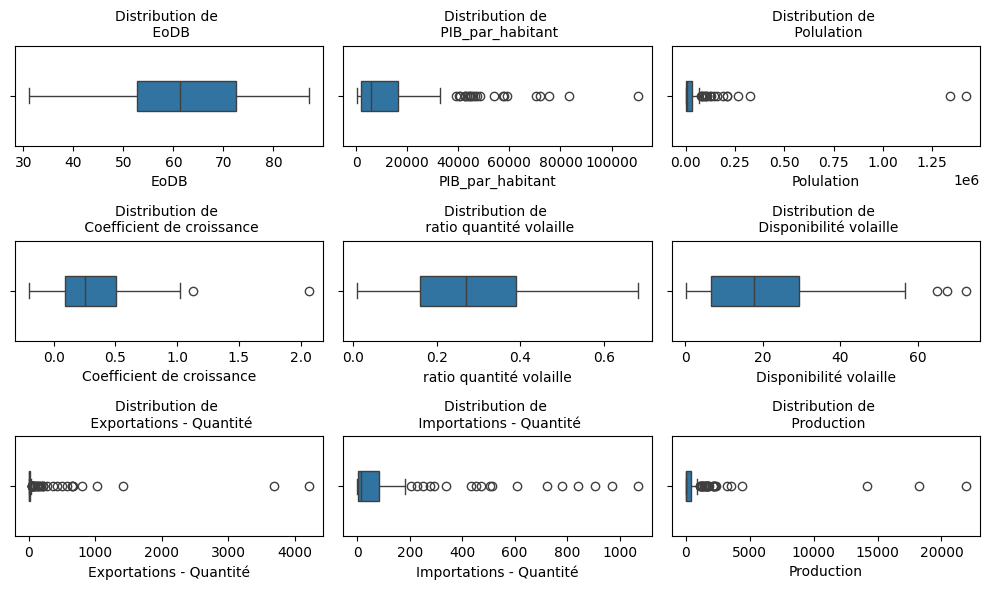

<Figure size 640x480 with 0 Axes>

In [154]:
# Distribution des variables
liste_variables = df.columns.tolist()

# Définir la taille du graphique
plt.figure(figsize=(10, 6))

# Boucle sur chaque variable
for i, var in enumerate(liste_variables, start=1):
    plt.subplot(3, 3,i)  # Créer un subplot
    sns.boxplot(x=df[var],width=0.3)  # Tracer un box plot pour chaque variable
    plt.title (f'Distribution de \n {var}',fontsize=10)

plt.tight_layout()
plt.show()

plt.savefig('/content/drive/My Drive/figure_P9/Distribution variable.jpg')

Dans le tableau describe on ne trouve pas de valeurs non cohérantes.
Les graphiques boxplots permettent cependant d'identifier 4 variables (PIB, Population, Exportations et Production) avec  une plage d'outliers très large ainsi que pour les importations dans une moindre mesure.

Pour ces 4 variables on appliquera une fonction log aux valeurs afin de réduire la distribution pour les analyses de clustering.

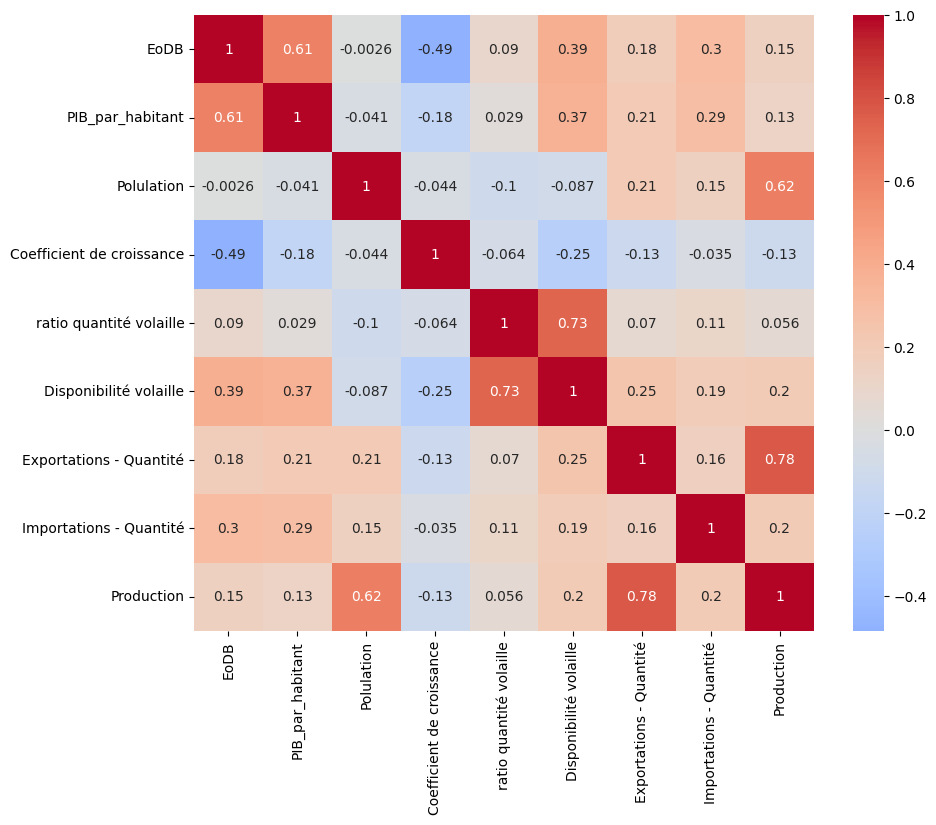

<Figure size 640x480 with 0 Axes>

In [155]:
#Calculer la matrice de corrélation (coefficient de corrélation de pearson)
correlation_matrix = df.corr()

# Créer une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

plt.savefig('/content/drive/My Drive/figure_P9/Corrélation varaible.jpg')

On observe une corrélation positive significative entre plusieurs paires de variables:
 - le PIB par habitant et l'EoDB (r = 0.61)
 - la disponibilité en volaille et le ratio quantité volaille (r=073)
 - Production et Population (r= 0.62)
 - Production et Exportations (r=0.78)

On note aussi Une corrélation "négative" entre le coefficent de croissance et l'EoDB (r = -049)